In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec 

In [14]:
sheets = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월']
dfs = []

for i in range(9):
    df = pd.read_excel('BDAA_1회_내부_공모전_데이터.xlsx', sheet_name = sheets[i])
    dfs.append(df)

In [15]:
for i in range(9):  
    df = dfs[i]
    print(df.shape)
    df['주문월'] = sheets[i]
    #print(df.head())

(3267, 37)
(1736, 38)
(4231, 38)
(3475, 38)
(11983, 38)
(22310, 40)
(15366, 40)
(33569, 39)
(6140, 39)


In [16]:
data = pd.concat(dfs, axis = 0, ignore_index = True)

In [17]:
data.keys()

Index(['주문접수일시', '주문번호', '유입매체', '주문구분', '유입채널', '회원구분', '아이디', '전시유입코드',
       '상품주문번호', '유형', '배송회수구분', '진행단계', '진행상태 (약식)', '구매확정', '주문완료일시',
       '구매확정일시', '출고지시일', '예외처리구분', '상태처리일시', '배송상품유형', '배송처리유형', '배송수단',
       '배송예약구분', '배송회차', '전시상품명', '전시단품명', '판매자상품번호', '판매자상품명', '판매자단품번호',
       '판매자단품명', '추가옵션', '주문판매유형', '상품유형', '브랜드', '판매가', '수량', '표준카테고리', '주문월',
       '모델번호', '롯데맴버스오프라인고객번호', '롯데맴버스온라인고객번호', '회원번호'],
      dtype='object')

In [20]:
data['주문금액']=data['판매가']*data['수량']
data['주문접수일시']=pd.to_datetime(data['주문접수일시'])
data['month']=data['주문접수일시'].dt.month
data['dayofweek']=data['주문접수일시'].dt.dayofweek

### 1. 월별 매출

{1: 133075747, 2: 44968578, 3: 119258980, 4: 103297653, 5: 353585139, 6: 646516214, 7: 494131772, 8: 987290226, 9: 216344255}


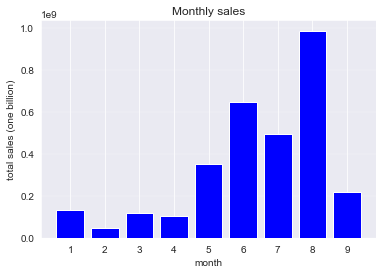

In [22]:
# bar plot
sns.set_style('darkgrid')

sales_by_month={}

for i in range(9):
    sale=data[data['month']==i+1]['주문금액'].sum()
    sales_by_month[i+1]=sale

print(sales_by_month)
    
plt.grid(True, axis='y', alpha=0.5, lw=0.4)
plt.bar(sales_by_month.keys(), sales_by_month.values(), color='blue')
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.xlabel('month')
plt.ylabel('total sales (one billion)')
plt.title('Monthly sales')
plt.show()

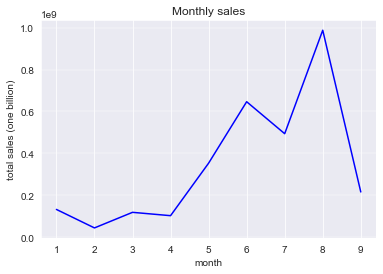

In [23]:
# line plot
plt.grid(True, axis='y', lw=0.4)
plt.plot(sales_by_month.keys(), sales_by_month.values(), color='blue')
plt.xlabel('month')
plt.ylabel('total sales (one billion)')
plt.title('Monthly sales')
plt.show()

- 4월부터 상승세를 보이다가 6월, 8월에 극대점을 보인다
- 특히 8월에 전월 대비 최대 매출을 보인다

In [24]:
# 월별 주문 접수 건수
total_order_month=pd.DataFrame(data['month'].value_counts()).sort_index()
total_order_month

,month
1,3267
2,1736
3,4231
4,3475
5,11983
6,22310
7,15366
8,33569
9,6140


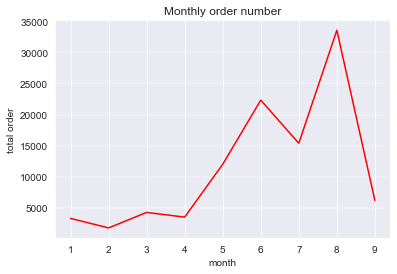

In [25]:
# 월별 주문 접수 건수: line plot
plt.grid(True, axis='y', lw=0.4)
plt.plot(range(1,10), total_order_month.values, color='red')
plt.xlabel('month')
plt.ylabel('total order')
plt.title('Monthly order number')
plt.show()

- 주문접수건수 또한 매출과 유사한 추이를 보인다

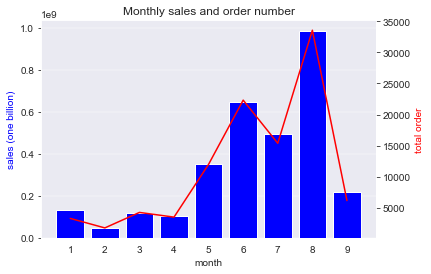

In [26]:
# 월별 매출과 주문접수건수

sns.set_style('dark')
fig, ax = plt.subplots()

ax.grid(True, axis='y', lw=0.4)
ax.bar(sales_by_month.keys(), sales_by_month.values(), color='blue')
ax.set_xlabel('month')
ax.set_ylabel('sales (one billion)', color='blue')
ax2=ax.twinx()
ax2.plot(range(1,10), total_order_month.values, color='red')
ax2.set_ylabel('total order', color='red')

plt.title('Monthly sales and order number')
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.show()

<AxesSubplot:ylabel='Density'>

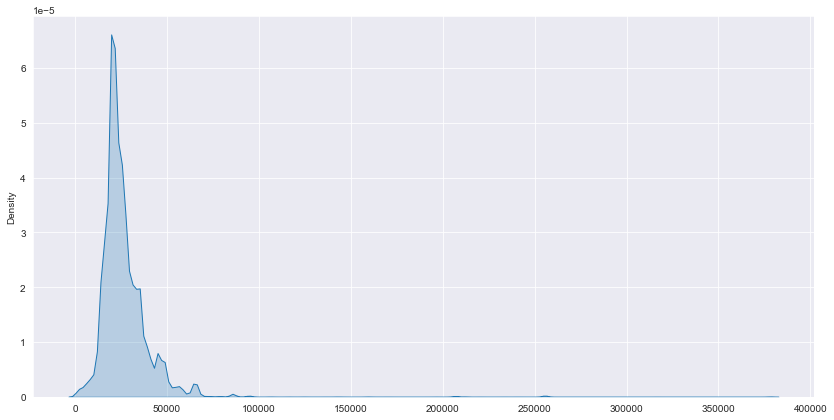

In [27]:
# 전체 판매가 분포

sns.set_style('darkgrid')
plt.figure(figsize=(14,7))
sns.kdeplot(data['판매가'].values, shade=True)

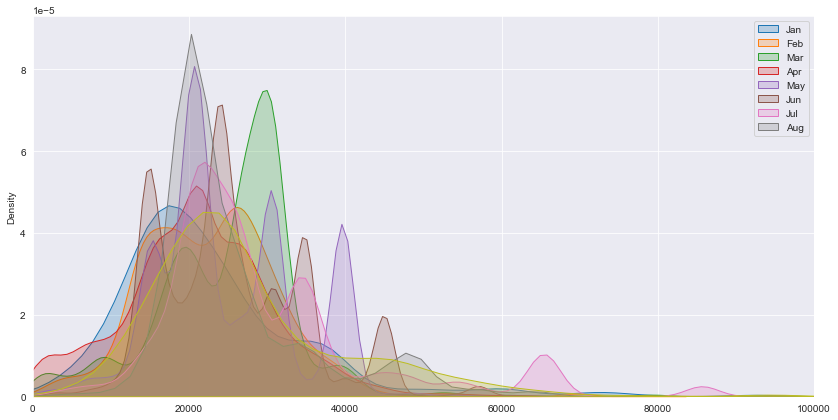

In [28]:
# 월별 판매가 분포

plt.figure(figsize=(14,7))

for i in range(9):
    sns.kdeplot(data[data['month']==i+1]['판매가'].values, shade=True)

plt.xlim([0,100000])
plt.legend(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])
plt.show()

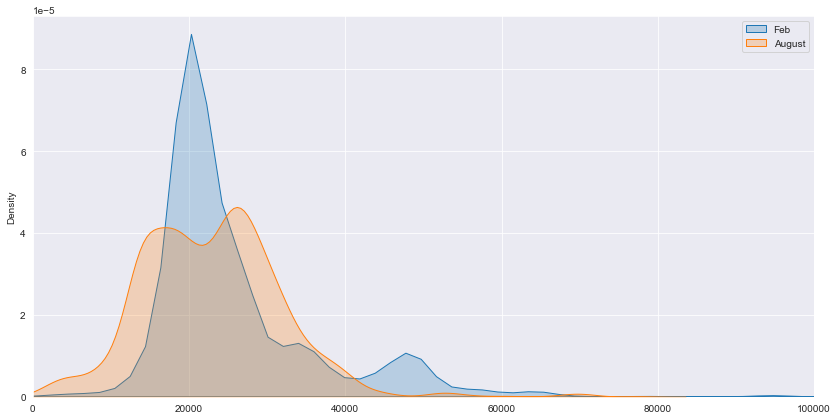

In [29]:
# 매출의 최상위와 최하위인 8월과 2월 판매가 분포 비교

plt.figure(figsize=(14,7))
sns.kdeplot(data[data['month']==8]['판매가'].values, shade=True)
sns.kdeplot(data[data['month']==2]['판매가'].values, shade=True)
plt.xlim([0,100000])
plt.legend(['Feb', 'August'])
plt.show()

- 최상위 매출을 보인 8월에는 2만원대의 저가 상품을 중심으로 분포함
- 최하위 매출을 보인 2월에는 보다 완만한 분포를 보임

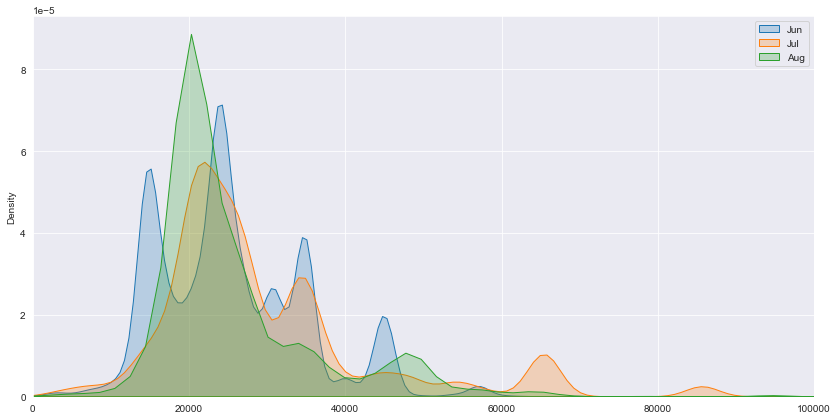

In [30]:
# 매출의 Top 3인 6-8월 판매가 분포 비교

plt.figure(figsize=(14,7))
sns.kdeplot(data[data['month']==6]['판매가'].values, shade=True)
sns.kdeplot(data[data['month']==7]['판매가'].values, shade=True)
sns.kdeplot(data[data['month']==8]['판매가'].values, shade=True)
plt.xlim([0,100000])
plt.legend(['Jun','Jul', 'Aug'])
plt.show()

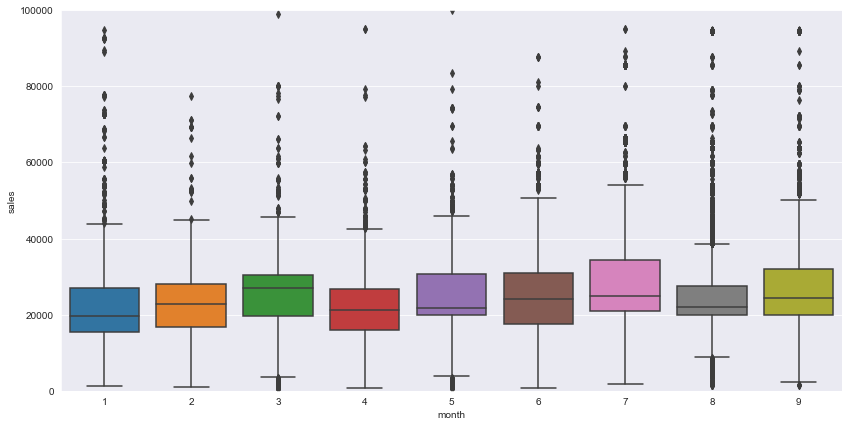

In [31]:
# 월별 판매가 boxplot

plt.figure(figsize=(14,7))
sns.boxplot(x='month', y='판매가',  data=data)
plt.ylabel('sales')
plt.ylim([0,100000])
plt.show()

C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 1008x504 with 0 Axes>

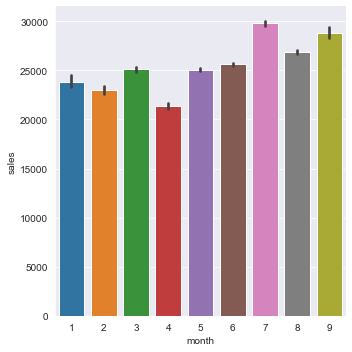

In [32]:
# 월별 판매가 cat plot: mean, significance level

plt.figure(figsize=(14,7))
sns.catplot(x='month', y='판매가', kind='bar', data=data)
plt.ylabel('sales')
plt.show()

### 2. 분기별 매출

In [33]:
data['quarter']=np.where(data['month'].isin([1,2,3]), 1, data['month'])
data['quarter']=np.where(data['month'].isin([4,5,6]), 2, data['quarter'])
data['quarter']=np.where(data['month'].isin([7,8,9]), 3, data['quarter'])
data[['month', 'quarter']].sample(5)

,month,quarter
94966,8,3
36321,6,2
69281,8,3
37307,6,2
44250,6,2


{1: 297303305, 2: 1103399006, 3: 1697766253}


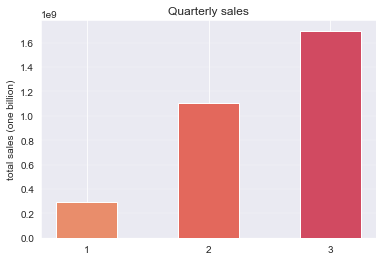

In [34]:
# 분기별 매출 barplot

sns.set_style('darkgrid')

sales_by_quarter={}

for i in range(3):
    sale=data[data['quarter']==i+1]['주문금액'].sum()
    sales_by_quarter[i+1]=sale
print(sales_by_quarter)

colors=sns.color_palette('flare')

plt.grid(True, axis='y', alpha=0.5, lw=0.4)
plt.bar(sales_by_quarter.keys(), sales_by_quarter.values(), color=colors, width=0.5)
plt.xticks([1,2,3])
plt.ylabel('total sales (one billion)')
plt.title('Quarterly sales')
plt.show()

- 3분기에서 뚜렷한 매출 상승을 보인다

In [35]:
# 분기별 주문 접수 건수
total_order_quarter=pd.DataFrame(data['quarter'].value_counts()).sort_index()
total_order_quarter

,quarter
1,9234
2,37768
3,55075


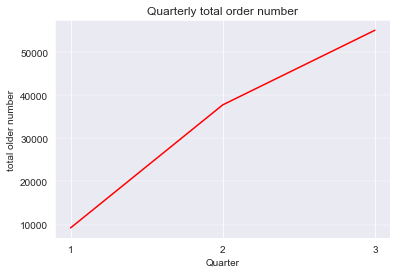

In [36]:
# 분기별 주문 접수 건수 line plot
plt.grid(True, axis='y', lw=0.4)
plt.plot(range(1,4), total_order_quarter.values, color='red')
plt.xticks([1,2,3])
plt.xlabel('Quarter')
plt.ylabel('total older number')
plt.title('Quarterly total order number')
plt.show()

- 주문접수건수 또한 매출과 비슷한 추이를 보인다

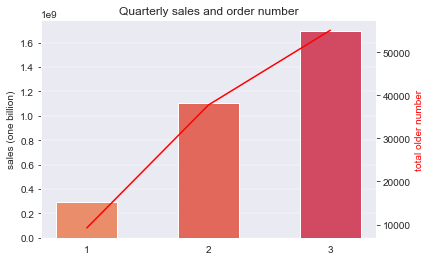

In [37]:
# 분기별 매출 및 주문접수건수
sns.set_style('dark')
fig, ax = plt.subplots()

ax.grid(True, axis='y', lw=0.4)
ax.bar(sales_by_quarter.keys(), sales_by_quarter.values(), color=colors, width=0.5)
ax.set_ylabel('sales (one billion)')
ax2=ax.twinx()
ax2.plot(range(1,4), total_order_quarter.values, color='red')
ax2.set_ylabel('total older number', color='red')

plt.xticks([1,2,3])
plt.title('Quarterly sales and order number')
plt.show()

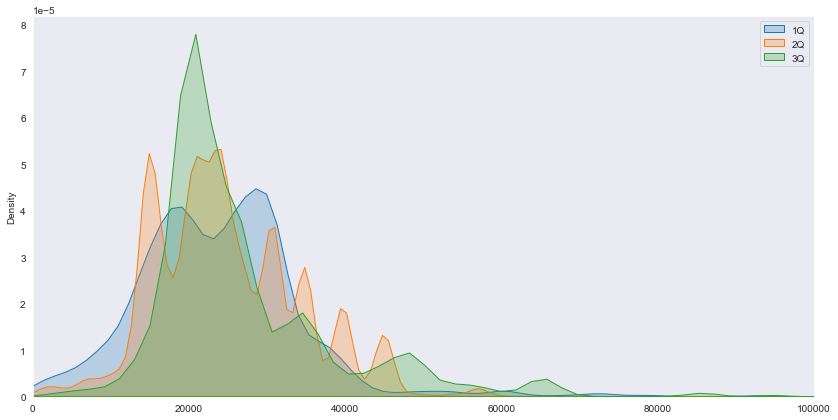

In [38]:
# 분기별 판매가 분포

plt.figure(figsize=(14,7))
sns.kdeplot(data[data['quarter']==1]['판매가'].values, shade=True)
sns.kdeplot(data[data['quarter']==2]['판매가'].values, shade=True)
sns.kdeplot(data[data['quarter']==3]['판매가'].values, shade=True)
plt.xlim([0,100000])
plt.legend(['1Q','2Q', '3Q'])
plt.show()

- 가장 높은 매출을 기록한 3분기 또한 8월의 판매가 분포와 비슷한 분포, 즉 2만원대 저가상품을 중심으로 한 분포를 보인다

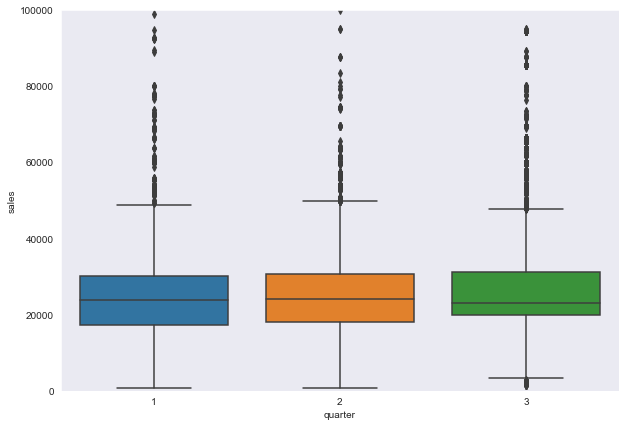

In [39]:
# 분기별 판매가 boxplot

plt.figure(figsize=(10,7))
sns.boxplot(x='quarter', y='판매가',  data=data)
plt.ylabel('sales')
plt.ylim([0,100000])
plt.show()

C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 720x504 with 0 Axes>

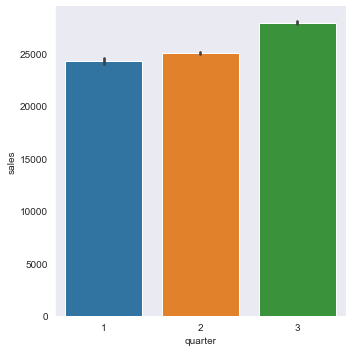

In [40]:
# 분기별 판매가 cat plot: mean, significance level

plt.figure(figsize=(10,7))
sns.catplot(x='quarter', y='판매가', kind='bar', data=data)
plt.ylabel('sales')
plt.show()

### 3. 요일별 매출

{0: 458464818, 1: 296925075, 2: 631940556, 3: 507220957, 4: 379851722, 5: 335336804, 6: 488728632}


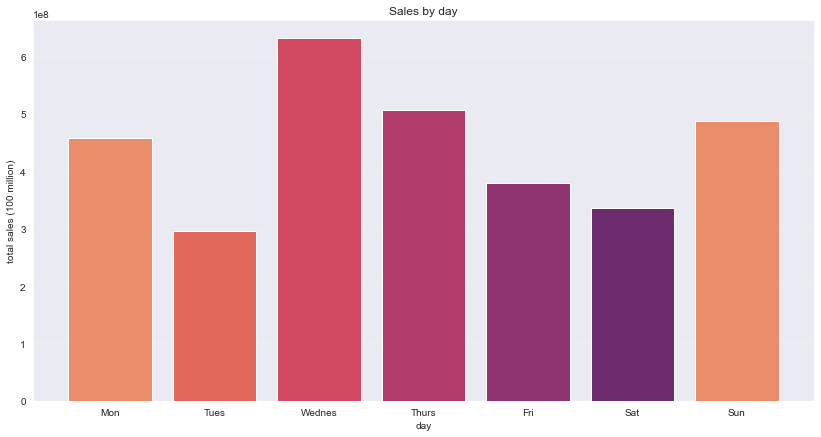

In [41]:
# 요일별 매출 bar plot

plt.figure(figsize=(14,7))

sales_by_day={}

for i in range(7):
    sale=data[data['dayofweek']==i]['주문금액'].sum()
    sales_by_day[i]=sale

print(sales_by_day)

plt.grid(True, axis='y', alpha=0.5, lw=0.4)
plt.bar(sales_by_day.keys(), sales_by_day.values(), color=colors)
plt.xticks([0,1,2,3,4,5,6],['Mon', 'Tues', 'Wednes', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.xlabel('day')
plt.ylabel('total sales (100 million)')
plt.title('Sales by day')
plt.show()

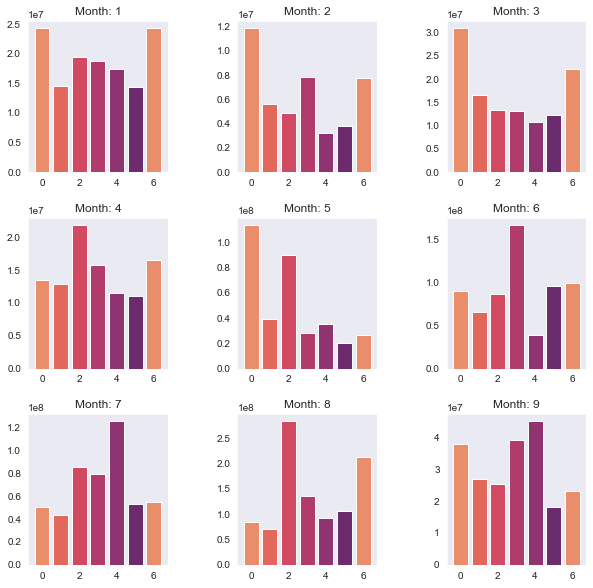

In [42]:
# month에 따른 요일 매출분석

grid = gridspec.GridSpec(3,3) 
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.3) 

for i in range(9):
    data_1=data[data['month']==i+1]
    sales_by_day={}
    for j in range(7):
        sale=data_1[data_1['dayofweek']==j]['주문금액'].sum()
        sales_by_day[j]=sale
    ax=plt.subplot(grid[i])
    ax.bar(sales_by_day.keys(), sales_by_day.values(), color=colors)
    ax.set_title(f'Month: {i+1}')

- 요일에 따른 매출의 분포는 month에 따라 상이한 분포를 보인다
- 요일이 매출에 직접적인 영향을 끼친다고 보긴 어렵다

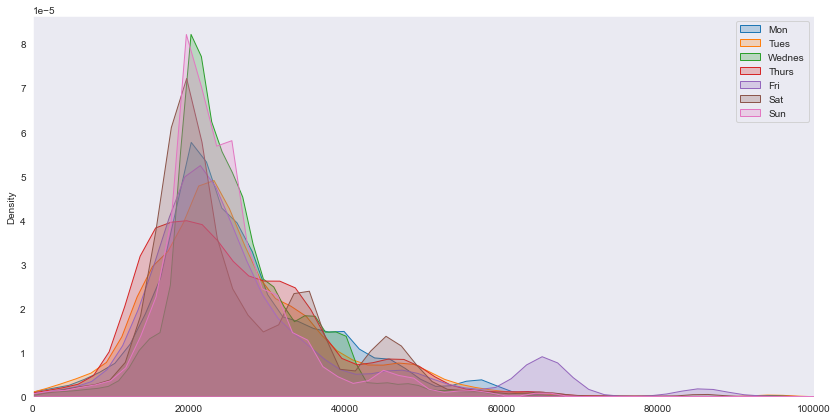

In [43]:
# 요일별 판매가 분포

plt.figure(figsize=(14,7))

for i in range(7):
    sns.kdeplot(data[data['dayofweek']==i]['판매가'].values, shade=True)

plt.legend(['Mon', 'Tues', 'Wednes', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.xlim([0,100000])
plt.show()

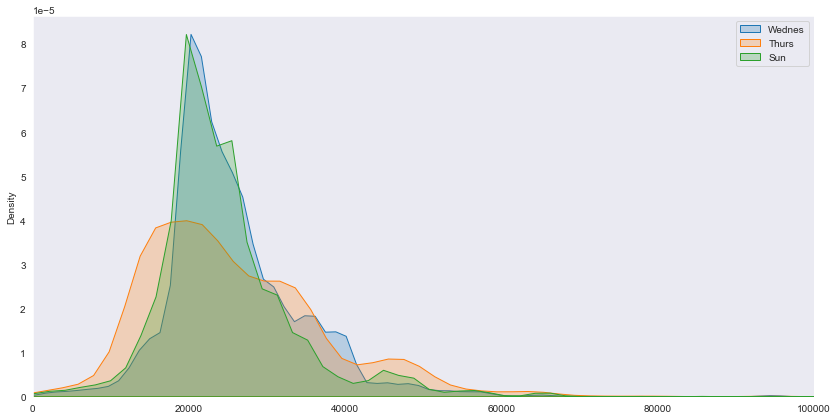

In [44]:
# 요일별 매출 top 3인 수요일, 목요일, 일요일의 판매가 분포

plt.figure(figsize=(14,7))
sns.kdeplot(data[data['dayofweek']==2]['판매가'].values, shade=True)
sns.kdeplot(data[data['dayofweek']==3]['판매가'].values, shade=True)
sns.kdeplot(data[data['dayofweek']==6]['판매가'].values, shade=True)
plt.legend(['Wednes', 'Thurs', 'Sun'])
plt.xlim([0,100000])
plt.show()

- top 1인 수요일과 top 2인 일요일은 매우 유사한 분포를 보임: 2만원대의 저가 상품 위주
- top 3인 목요일은 이에 비해 완만한 분포를 보임

In [45]:
data[data['dayofweek']==2]['month'].value_counts()

8    10250
6     3313
7     3195
5     2622
9      870
4      506
3      442
1      423
2      218
Name: month, dtype: int64

In [46]:
data[data['dayofweek']==3]['month'].value_counts()

6    5879
8    3238
7    2637
9     944
5     899
4     549
3     473
1     402
2     294
Name: month, dtype: int64

In [47]:
data[data['dayofweek']==6]['month'].value_counts()

8    8714
6    3474
7    1769
5     977
3     763
9     744
4     672
1     654
2     286
Name: month, dtype: int64

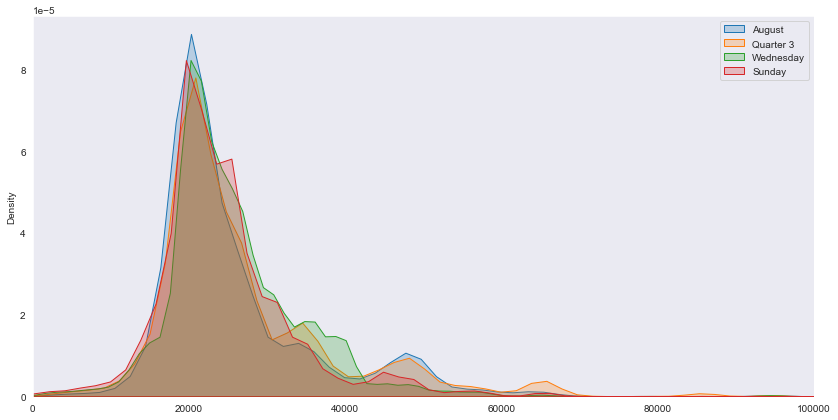

In [48]:
plt.figure(figsize=(14,7))

sns.kdeplot(data[data['month']==8]['판매가'].values, shade=True)
sns.kdeplot(data[data['quarter']==3]['판매가'].values, shade=True)
sns.kdeplot(data[data['dayofweek']==2]['판매가'].values, shade=True)
sns.kdeplot(data[data['dayofweek']==6]['판매가'].values, shade=True)

plt.legend(['August', 'Quarter 3', 'Wednesday', 'Sunday'])
plt.xlim([0,100000])
plt.show()

### 4. 평일/휴일 분석

454880625.6


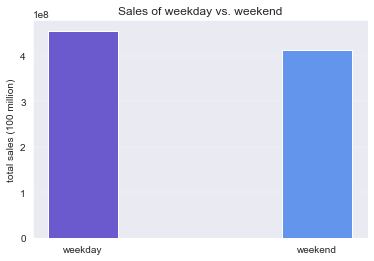

In [49]:
# 평일/휴일: 평균 매출 분석

data['weekday_end']=np.where(data['dayofweek']<=4, 0, 1)

sales_weekday=data[data['weekday_end']==0]['주문금액'].sum()/5
sales_weekend=data[data['weekday_end']==1]['주문금액'].sum()/2

print(sales_weekday)

plt.grid(True, axis='y', alpha=0.5, lw=0.4)
plt.bar(['weekday', 'weekend'], [sales_weekday, sales_weekend], width=0.3, color=['slateblue', 'cornflowerblue'])
plt.ylabel('total sales (100 million)')
plt.title('Sales of weekday vs. weekend')
plt.show()

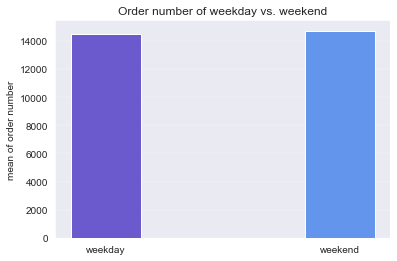

In [50]:
# 평일/휴일 평균 주문 접수 건수

order_weekday=data[data['weekday_end']==0]['weekday_end'].count()/5
order_weekend=data[data['weekday_end']==1]['weekday_end'].count()/2

plt.grid(True, axis='y', alpha=0.5, lw=0.4)
plt.bar(['weekday', 'weekend'], [order_weekday, order_weekend], width=0.3, color=['slateblue', 'cornflowerblue'])
plt.ylabel('mean of order number')
plt.title('Order number of weekday vs. weekend')
plt.show()

### 5. 오전/오후 분석

{0: 1156478954, 1: 1941989610}


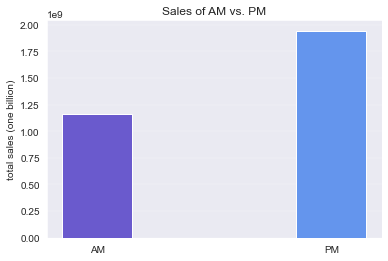

In [51]:
# 오전/오후: 매출

data['오전_오후']=np.where(data['주문접수일시'].dt.hour<=11, 0, 1)

sales_by_AMPM={}

for i in range(2):
    sale=data[data['오전_오후']==i]['주문금액'].sum()
    sales_by_AMPM[i]=sale

print(sales_by_AMPM)
plt.grid(True, axis='y', alpha=0.5, lw=0.4)
plt.bar(sales_by_AMPM.keys(), sales_by_AMPM.values(), width=0.3, color=['slateblue', 'cornflowerblue'])
plt.xticks([0,1], ['AM', 'PM'])
plt.ylabel('total sales (one billion)')
plt.title('Sales of AM vs. PM')
plt.show()

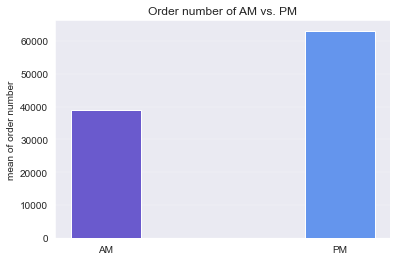

In [52]:
# 오전/오후 평균 주문 접수 건수

total_order_AM=data[data['오전_오후']==0]['오전_오후'].count()
total_order_PM=data[data['오전_오후']==1]['오전_오후'].count()

plt.grid(True, axis='y', alpha=0.5, lw=0.4)
plt.bar(['AM', 'PM'], [total_order_AM, total_order_PM], width=0.3, color=['slateblue', 'cornflowerblue'])
plt.ylabel('mean of order number')
plt.title('Order number of AM vs. PM')
plt.show()

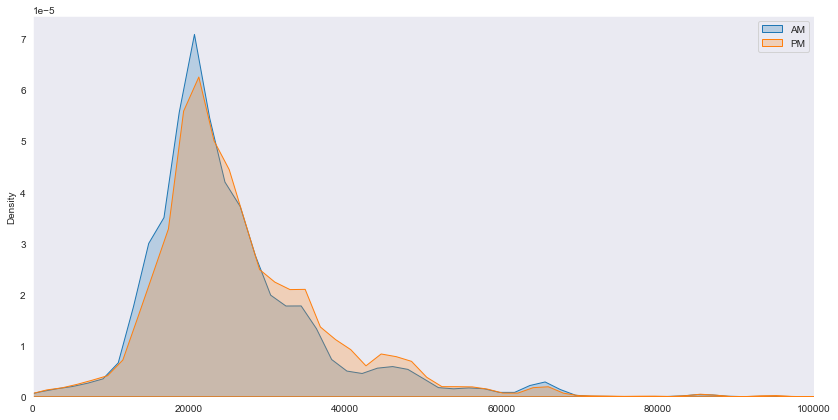

In [53]:
plt.figure(figsize=(14,7))

sns.kdeplot(data[data['오전_오후']==0]['판매가'].values, shade=True)
sns.kdeplot(data[data['오전_오후']==1]['판매가'].values, shade=True)
plt.legend(['AM', 'PM'])
plt.xlim([0,100000])
plt.show()

### Insight

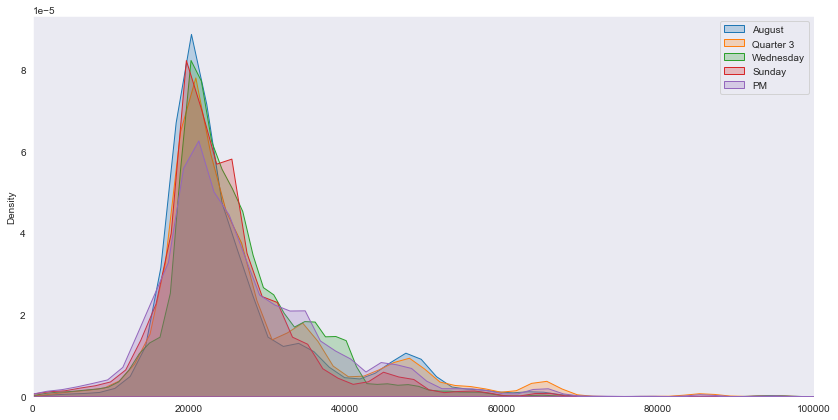

In [54]:
plt.figure(figsize=(14,7))

sns.kdeplot(data[data['month']==8]['판매가'].values, shade=True)
sns.kdeplot(data[data['quarter']==3]['판매가'].values, shade=True)
sns.kdeplot(data[data['dayofweek']==2]['판매가'].values, shade=True)
sns.kdeplot(data[data['dayofweek']==6]['판매가'].values, shade=True)
sns.kdeplot(data[data['오전_오후']==1]['판매가'].values, shade=True)

plt.legend(['August', 'Quarter 3', 'Wednesday', 'Sunday', 'PM'])
plt.xlim([0,100000])
plt.show()

In [55]:
# 8월의 수요일과 일요일에 주로 판매된 상품 분석
data_ins=data[data['dayofweek'].isin([2,6])].query('month==8')

<Figure size 1008x504 with 0 Axes>

C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54663 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py

C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51613 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 54663 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50724 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:203: Runt

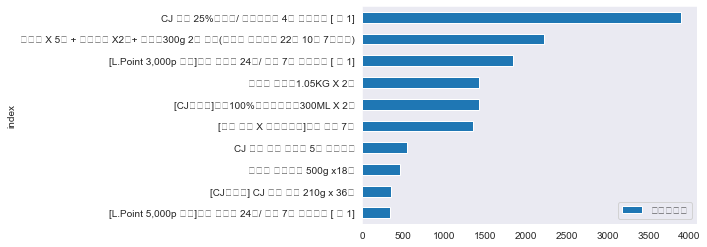

<Figure size 1008x504 with 0 Axes>

C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44608 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53416 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py

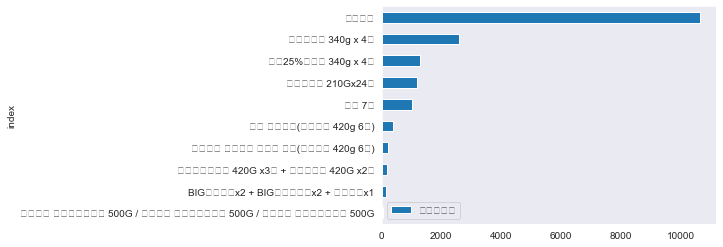

<Figure size 1008x504 with 0 Axes>

C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0, flags=flags)


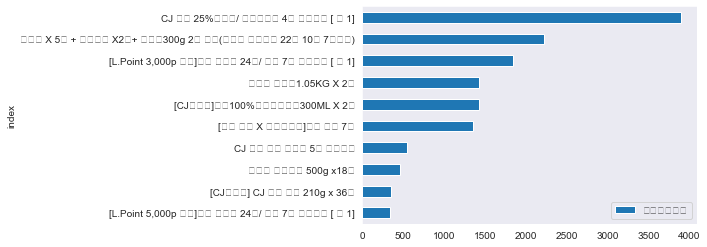

<Figure size 1008x504 with 0 Axes>

C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45257 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51593 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py

C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 46024 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52992 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 45320 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44191 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\USER\anaconda3\envs\tf2\lib\site-packages\matplotlib\backends\backend_agg.py:203: Runt

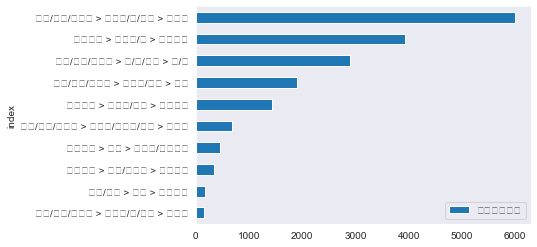

In [56]:
cat_features=['전시상품명', '전시단품명', '판매자상품명', '표준카테고리']

for feature in cat_features:
    valuecount=pd.DataFrame(data_ins[feature].value_counts().sort_values().tail(10)).reset_index()
    plt.figure(figsize=(14,7))
    valuecount.plot(kind='barh', x='index', y=feature)
    plt.show()

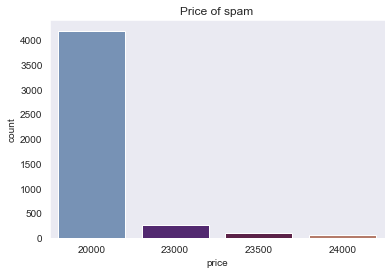

In [57]:
data_ham=data[data['판매자상품명']=='CJ 스팸 25%라이트/ 스팸클래식 4개 골라담기 [ 택 1]']
sns.countplot(x='판매가', data=data_ham, palette='twilight')
plt.xlabel('price')
plt.title('Price of spam')
plt.show()

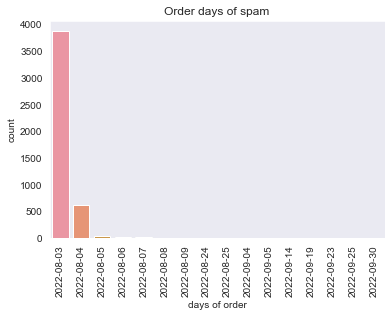

In [58]:
ham_date=pd.DataFrame(data_ham['주문접수일시'].dt.date.sort_values())
sns.countplot(x='주문접수일시', data=ham_date)
plt.xticks(rotation=90)
plt.xlabel('days of order')
plt.title("Order days of spam")
plt.show()

In [59]:
pd.DataFrame(ham_date)

,주문접수일시
90386,2022-08-03
91491,2022-08-03
91492,2022-08-03
91493,2022-08-03
91494,2022-08-03
...,...
98089,2022-09-23
97456,2022-09-25
97458,2022-09-25
97512,2022-09-25
